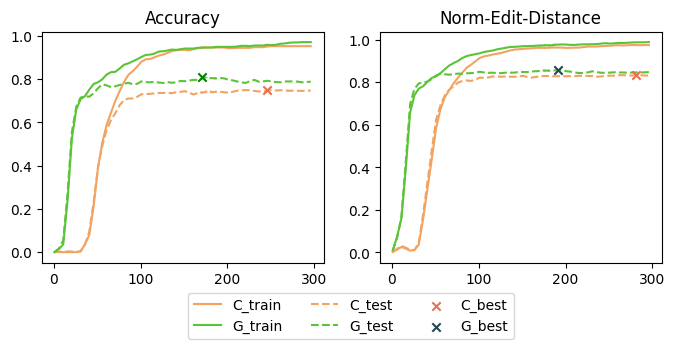

In [1]:
from database import *
import pandas as pd
import matplotlib.pyplot as plt
workdb = WorkDB()

def smooth(x, window):
    new = []
    for i in range(len(x)):
        r = max(i-window+1, 0)
        q = i
        new.append(sum(x[r:q+1])/(q-r+1))
    return new

plt.gcf().set_size_inches(8, 3)
    
window=2
plt.subplot(1, 2, 1)
plt.title(f"Accuracy")
df = workdb.get_report_df("rec_grapheme_10000_C").sort_values("version")
task_df = df[df["task"] == "train"]
data = smooth(task_df["character_acc"], window=window)
plt.plot(task_df["version"], data, label="G_test", color=(243/255, 163/255, 97/255))
        
task_df = df[df["task"] == "test"]
data = smooth(task_df["character_acc"], window=window)
plt.plot(task_df["version"], data, "--", label="G_test", color=(243/255, 163/255, 97/255))



df = workdb.get_report_df("rec_grapheme_10000_G").sort_values("version")
task_df = df[df["task"] == "train"]
data = smooth(task_df["composed_acc"], window=window)
plt.plot(task_df["version"], data, label="C_test", color=(91/255, 196/255, 54/255))
        
task_df = df[df["task"] == "test"]
data = smooth(task_df["composed_acc"], window=window)
plt.plot(task_df["version"], data, "--",  label="C_test", color=(91/255, 196/255, 54/255))

plt.scatter(246, 0.752, marker="x", color=(232/255, 112/255, 82/255), zorder=2)
plt.scatter(171, 0.809, marker="x", color="green", zorder=2)





plt.subplot(1, 2, 2)
plt.title(f"Norm-Edit-Distance")
df = workdb.get_report_df("rec_grapheme_10000_C").sort_values("version")
task_df = df[df["task"] == "train"]
data = smooth(task_df["character_norm_edit_dis"], window=window)
ctr = plt.plot(task_df["version"], data, label="C_train", color=(243/255, 163/255, 97/255))

df = workdb.get_report_df("rec_grapheme_10000_G").sort_values("version")
task_df = df[df["task"] == "train"]
data = smooth(task_df["composed_norm_edit_dis"], window=window)
gtr = plt.plot(task_df["version"], data, label="G_train", color=(91/255, 196/255, 54/255))
        

df = workdb.get_report_df("rec_grapheme_10000_C").sort_values("version")
task_df = df[df["task"] == "test"]
data = smooth(task_df["character_norm_edit_dis"], window=window)
ct = plt.plot(task_df["version"], data, "--", label="C_test", color=(243/255, 163/255, 97/255))

df = workdb.get_report_df("rec_grapheme_10000_G").sort_values("version")
task_df = df[df["task"] == "test"]
data = smooth(task_df["composed_norm_edit_dis"], window=window)
gt = plt.plot(task_df["version"], data, "--",  label="G_test", color=(91/255, 196/255, 54/255))


cp = plt.scatter(281, 0.834, marker="x", color=(232/255, 112/255, 82/255), zorder=2, label="C_best")
gp = plt.scatter(191, 0.858, marker="x", color=(38/255, 70/255, 84/255), zorder=2, label="G_best")   
# 


plt.legend( bbox_to_anchor=(0.5, -0.1), ncol=3)


# workdb.draw_rec_graph_v2("rec_grapheme_10000_C", window=2, metrics = ["character_acc", "character_norm_edit_dis"], tasks=["train", "test"], labels = ["G_train", "G_test"])
# workdb.draw_rec_graph_v2("rec_grapheme_10000_G", window=2, metrics = ["composed_acc", "composed_norm_edit_dis"], tasks=["train", "test"], labels = ["G_train", "G_test"])